# Imports

In [2]:
# install additional packages if running on Emscripten
import platform

notebook_platform = platform.uname()
if notebook_platform.system == "Emscripten":
    import piplite

    await piplite.install(["openpyxl", "seaborn"])

In [3]:
from enum import Enum
import pathlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lmfit.models import LinearModel
import numpy as np

sns.set_style("ticks", {"axes.grid": True})

# Data

In [4]:
this_file = pathlib.Path().absolute()
data_dir = this_file.parent / "data"
data_dir

WindowsPath('c:/Users/Legion/workspace/tld_let_calibration/data')

## Calibrations

In [5]:
df_dcpt = pd.read_csv(data_dir / "interim" / "ratio_signal.csv")
df_dcpt

,exp,det_id,ratio_signal
0,2a,9,1.103115
1,2a,16,1.026642
2,2a,15,1.057581
3,2a,14,1.091050
4,2a,13,1.086787
5,2a,12,0.958859
6,2a,11,1.013075
7,2a,10,1.162400
8,1a,8,1.334733
9,1a,7,1.269311


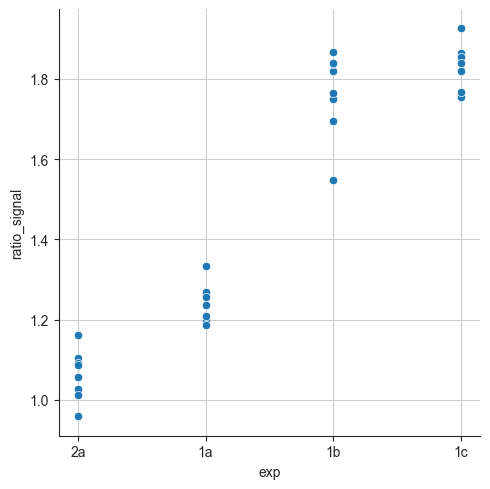

In [6]:
sns.relplot(data=df_dcpt, x="exp", y="ratio_signal")

In [8]:
df_sck = pd.read_excel(data_dir / "raw" / "parisi_calibration" / "TLD_results.xlsx", sheet_name="Tabelle1")
df_sck

,Plan,MTS-7/MCP-7,MTS-7/MCP-7_std,fLET_protons_keV_um_mean,fLET_protons_keV_um_lower,fLET_protons_keV_um_upper,dLET_protons_keV_um_mean,dLET_protons_keV_um_lower,dLET_protons_keV_um_upper,fLET_all_keV_um_mean,fLET_all_keV_um_lower,fLET_all_keV_um_upper,dLET_all_keV_um_mean,dLET_all_keV_um_lower,dLET_all_keV_um_upper
0,2a,0.994471,0.111556,0.414933,0.230143,0.900774,0.534686,0.465155,0.970091,0.431319,0.253011,0.916905,7.174233,4.499999,12.506658
1,1a,1.173488,0.153808,1.308262,0.505755,2.141163,1.366723,0.607889,2.189788,1.325618,0.521495,2.162188,4.120295,4.149715,6.125918
2,1b,1.673947,0.203877,4.408165,3.275391,5.421574,4.569571,3.328760,5.923428,4.426321,3.298399,5.436024,5.314696,4.658748,6.395762
3,1c,1.914006,0.334864,5.615799,3.918560,8.206284,6.227678,4.016166,12.866289,5.629722,3.938963,8.215390,6.665550,4.984218,13.054751


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


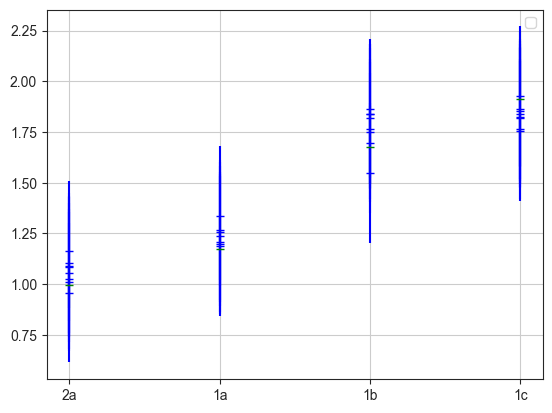

In [22]:
fig, ax = plt.subplots()
plt.errorbar(df_sck["Plan"], df_sck["MTS-7/MCP-7"], yerr=df_sck["MTS-7/MCP-7_std"], fmt="_", color="green")
plt.errorbar(df_dcpt["exp"], df_dcpt["ratio_signal"], yerr=df_dcpt["ratio_signal"].std(), fmt="_", color="blue")
# plt.scatter(df_dcpt["exp"], df_dcpt["ratio_signal"], marker="o")
# sns.scatterplot(data=df_dcpt, x="exp", y="ratio_signal", ax=ax, label="IFJ")
# sns.scatterplot(data=df_sck, x="Plan", y="MTS-7/MCP-7", ax=ax, label="SCK mean")
ax.legend()

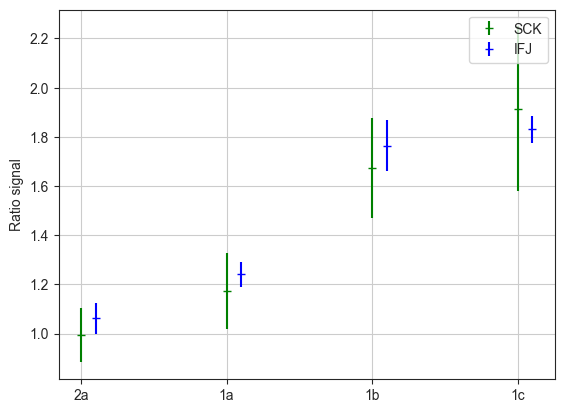

In [32]:
fig, ax = plt.subplots()

# Create a mapping between textual categories and numerical values
category_mapping = {category: i for i, category in enumerate(df_sck["Plan"].unique())}

# Convert textual x-values to numerical values for both datasets
df_sck["Plan_numeric"] = df_sck["Plan"].map(category_mapping)
df_dcpt["exp_numeric"] = df_dcpt["exp"].map(category_mapping)

# Plot the first dataset
plt.errorbar(
    df_sck["Plan_numeric"], df_sck["MTS-7/MCP-7"], yerr=df_sck["MTS-7/MCP-7_std"], fmt="_", color="green", label="SCK"
)

# Add an offset to the x-values of the second dataset
offset = 0.1  # Adjust this value based on your preference
df_dcpt["exp_shifted"] = df_dcpt["exp_numeric"] + offset

# Plot the second dataset with the adjusted x-values
plt.errorbar(
    df_dcpt["exp_shifted"].unique(),
    df_dcpt.groupby("exp_shifted")["ratio_signal"].mean(),
    yerr=df_dcpt.groupby("exp_shifted")["ratio_signal"].std(),
    fmt="_",
    color="blue",
    label="IFJ",
)

# Use the original textual categories for x-axis ticks
plt.xticks(np.arange(len(category_mapping)), df_sck["Plan"].unique())

plt.ylabel("Ratio signal")

plt.legend()

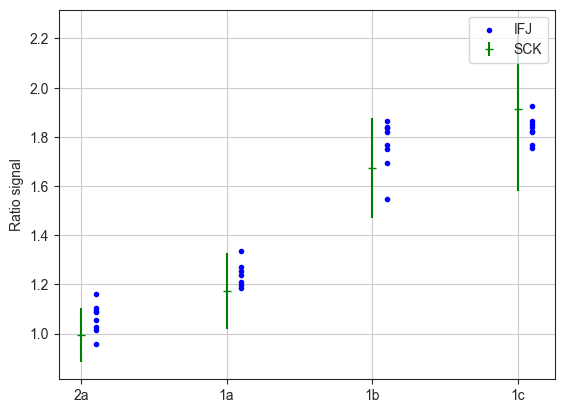

In [34]:
fig, ax = plt.subplots()

# Create a mapping between textual categories and numerical values
category_mapping = {category: i for i, category in enumerate(df_sck["Plan"].unique())}

# Convert textual x-values to numerical values for both datasets
df_sck["Plan_numeric"] = df_sck["Plan"].map(category_mapping)
df_dcpt["exp_numeric"] = df_dcpt["exp"].map(category_mapping)

# Plot the first dataset
plt.errorbar(
    df_sck["Plan_numeric"], df_sck["MTS-7/MCP-7"], yerr=df_sck["MTS-7/MCP-7_std"], fmt="_", color="green", label="SCK"
)

# Add an offset to the x-values of the second dataset
offset = 0.1  # Adjust this value based on your preference
df_dcpt["exp_shifted"] = df_dcpt["exp_numeric"] + offset

# Plot the second dataset with the adjusted x-values
plt.scatter(df_dcpt["exp_shifted"], df_dcpt["ratio_signal"], marker=".", color="blue", label="IFJ")

# Use the original textual categories for x-axis ticks
plt.xticks(np.arange(len(category_mapping)), df_sck["Plan"].unique())

plt.ylabel("Ratio signal")

plt.legend()